<a href="https://colab.research.google.com/github/God-Orcale/AI_Test/blob/main/Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.08MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.1MB/s]


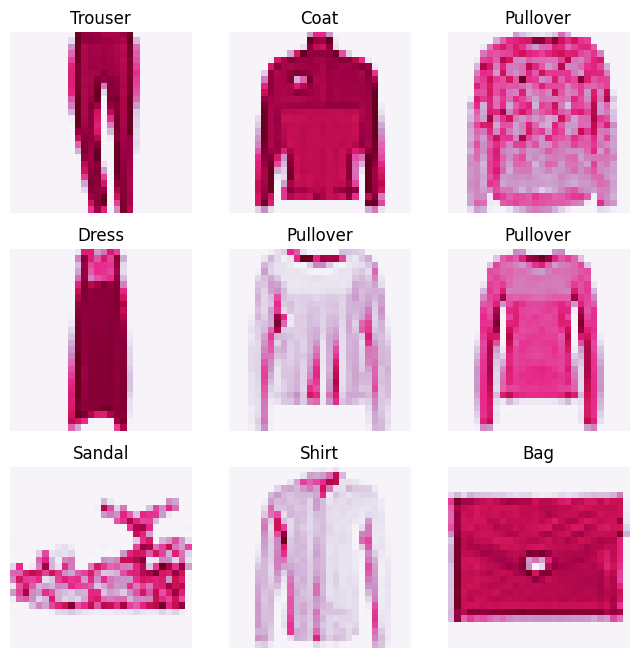

In [6]:
labels_map={
     0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols ,rows =3,3
for i in range(1,cols * rows +1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img,label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="PuRd")
plt.show()

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImage(Dataset):
  def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_form
# __init__ 函数在实例化 Dataset 对象时运行一次。我们初始化 包含图像、annotations 文件和两个转换的目录

  def __len__(self):
    return len(self.img_labels)
# __len__ 函数返回数据集中的样本数。
  def __getitem__(self,idx):
    img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
# __getitem__ 函数加载并返回位于给定 index 处的数据集中的样本。
# 根据索引，它识别图像在磁盘上的位置，使用 将其转换为张量，检索 中 CSV 数据的相应标签，对它们调用 transform 函数（如果适用），并返回 Tensor 图像和元组中的相应标签。

In [9]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


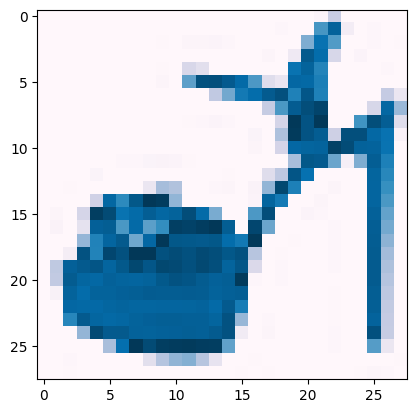

Label: 5


In [11]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap="PuBu")
plt.show()
print(f"Label: {label}")